In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

import math

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px


# Para el modelado de los datos
# -----------------------------------------------------------------------
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Preprocesado y modelado
# -----------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler, RobustScaler


# Sacar número de clusters y métricas
# -----------------------------------------------------------------------
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

# Modelos de clustering
# -----------------------------------------------------------------------
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering

# Para visualizar los dendrogramas
# -----------------------------------------------------------------------
import scipy.cluster.hierarchy as sch
# Configuración warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

import sys
import os
sys.path.append(os.path.abspath("../src"))   
import soporte_preprocesamiento_clustering as f

from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler

from sklearn.preprocessing import OneHotEncoder #, TargetEncoder # para poder aplicar los métodos de OneHot, Ordinal,  Label y Target Encoder 

from category_encoders import TargetEncoder 
pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")

In [2]:
df_crudo=pd.read_csv("..\datos\datos1\Global_Superstore.csv", sep=",", encoding="latin1")

In [3]:
df_crudo.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,NaN,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,NaN,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


Paso el Customer ID al índice

In [4]:
df_crudo.set_index("Customer ID", inplace=True)
df_crudo.index.name="customer_ID"

In [5]:
df_crudo.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
customer_ID,,,,,,,,,,,,,,,,,,,,,,,
RH-19495,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
JR-16210,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical


## EDA

In [6]:
f.exploracion_dataframe(df_crudo, "Segment", estadisticos = False)

El número de datos es 51290 y el de columnas es 23

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 0

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos
Postal Code,80.51472



 ..................... 

Los tipos de las columnas son:


,tipo_dato
Row ID,int64
Order ID,object
Order Date,object
Ship Date,object
Ship Mode,object
Customer Name,object
Segment,object
City,object
State,object
Country,object



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna ORDER ID tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 25035 categorías (5/25035)


,count
Order ID,
CA-2014-100111,14
NI-2014-8880,13
TO-2014-9950,13
IN-2012-41261,13
IN-2013-42311,13


La columna ORDER DATE tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 1430 categorías (5/1430)


,count
Order Date,
18-06-2014,135
18-11-2014,127
03-09-2014,126
20-11-2014,118
29-12-2014,116


La columna SHIP DATE tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 1464 categorías (5/1464)


,count
Ship Date,
22-11-2014,130
07-09-2014,115
07-12-2014,101
17-11-2014,101
29-11-2014,100


La columna SHIP MODE tiene los siguientes valores únicos:
Mostrando 4 categorías con más valores del total de 4 categorías (4/4)


,count
Ship Mode,
Standard Class,30775
Second Class,10309
First Class,7505
Same Day,2701


La columna CUSTOMER NAME tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 795 categorías (5/795)


,count
Customer Name,
Muhammed Yedwab,108
Steven Ward,106
Gary Hwang,102
Patrick O'Brill,102
Bill Eplett,102


La columna SEGMENT tiene los siguientes valores únicos:
Mostrando 3 categorías con más valores del total de 3 categorías (3/3)


,count
Segment,
Consumer,26518
Corporate,15429
Home Office,9343


La columna CITY tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 3636 categorías (5/3636)


,count
City,
New York City,915
Los Angeles,747
Philadelphia,537
San Francisco,510
Santo Domingo,443


La columna STATE tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 1094 categorías (5/1094)


,count
State,
California,2001
England,1499
New York,1128
Texas,985
Ile-de-France,981


La columna COUNTRY tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 147 categorías (5/147)


,count
Country,
United States,9994
Australia,2837
France,2827
Mexico,2644
Germany,2065


La columna MARKET tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 7 categorías (5/7)


,count
Market,
APAC,11002
LATAM,10294
EU,10000
US,9994
EMEA,5029


La columna REGION tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 13 categorías (5/13)


,count
Region,
Central,11117
South,6645
EMEA,5029
North,4785
Africa,4587


La columna PRODUCT ID tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 10292 categorías (5/10292)


,count
Product ID,
OFF-AR-10003651,35
OFF-AR-10003829,31
OFF-BI-10003708,30
OFF-BI-10002799,30
FUR-CH-10003354,28


La columna CATEGORY tiene los siguientes valores únicos:
Mostrando 3 categorías con más valores del total de 3 categorías (3/3)


,count
Category,
Office Supplies,31273
Technology,10141
Furniture,9876


La columna SUB-CATEGORY tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 17 categorías (5/17)


,count
Sub-Category,
Binders,6152
Storage,5059
Art,4883
Paper,3538
Chairs,3434


La columna PRODUCT NAME tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 3788 categorías (5/3788)


,count
Product Name,
Staples,227
"Cardinal Index Tab, Clear",92
"Eldon File Cart, Single Width",90
"Rogers File Cart, Single Width",84
"Ibico Index Tab, Clear",83


La columna ORDER PRIORITY tiene los siguientes valores únicos:
Mostrando 4 categorías con más valores del total de 4 categorías (4/4)


,count
Order Priority,
Medium,29433
High,15501
Critical,3932
Low,2424



----------

Las principales estadísticas de las variables númericas son:


,count,mean,std,min,25%,50%,75%,max
Row ID,51290.0,25645.500000,14806.291990,1.000,12823.250000,25645.500,38467.7500,51290.000
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.000000,56430.500,90008.0000,99301.000
Sales,51290.0,246.490581,487.565361,0.444,30.758625,85.053,251.0532,22638.480
Quantity,51290.0,3.476545,2.278766,1.000,2.000000,3.000,5.0000,14.000
Discount,51290.0,0.142908,0.212280,0.000,0.000000,0.000,0.2000,0.850
Profit,51290.0,28.610982,174.340972,-6599.978,0.000000,9.240,36.8100,8399.976
Shipping Cost,51290.0,26.375915,57.296804,0.000,2.610000,7.790,24.4500,933.570



----------

Las principales estadísticas de las variables categóricas son:


,count,unique,top,freq
Order ID,51290,25035,CA-2014-100111,14
Order Date,51290,1430,18-06-2014,135
Ship Date,51290,1464,22-11-2014,130
Ship Mode,51290,4,Standard Class,30775
Customer Name,51290,795,Muhammed Yedwab,108
Segment,51290,3,Consumer,26518
City,51290,3636,New York City,915
State,51290,1094,California,2001
Country,51290,147,United States,9994
Market,51290,7,APAC,11002



----------

Las características principales del dataframe son:
<class 'pandas.core.frame.DataFrame'>
Index: 51290 entries, RH-19495 to MC-18100
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer Name   51290 non-null  object 
 6   Segment         51290 non-null  object 
 7   City            51290 non-null  object 
 8   State           51290 non-null  object 
 9   Country         51290 non-null  object 
 10  Postal Code     9994 non-null   float64
 11  Market          51290 non-null  object 
 12  Region          51290 non-null  object 
 13  Product ID      51290 non-null  object 
 14  Category        51290 non-null  object 
 15  Sub-Category    51290 non-null  object 
 16  Product

None

### *NULOS*

In [7]:
df_crudo.isna().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

Me cargo Postal Code porque tiene demasiada proporción de nulos

In [8]:
df_crudo.drop(columns="Postal Code", inplace=True)

Paso la columna Quantity a categórica agrupando

In [9]:
dicc_quantity={1:"entre 1 y 2",
               2:"entre 1 y 2",
               3:"entre 3 y 4",
               4:"entre 3 y 4",
               5:"entre 5 y 6",
               6:"entre 5 y 6",
               7:"entre 7 y 8",
               8:"entre 7 y 8",
               9:"entre 9 y 10",
               10:"entre 9 y 10",
               11:"entre 11 y 12",
               12:"entre 11 y 12",
               13:"entre 13 y 14",
               14:"entre 13 y14"}
df_crudo["Quantity"]=df_crudo["Quantity"].map(dicc_quantity)

#### Hacemos visualización 

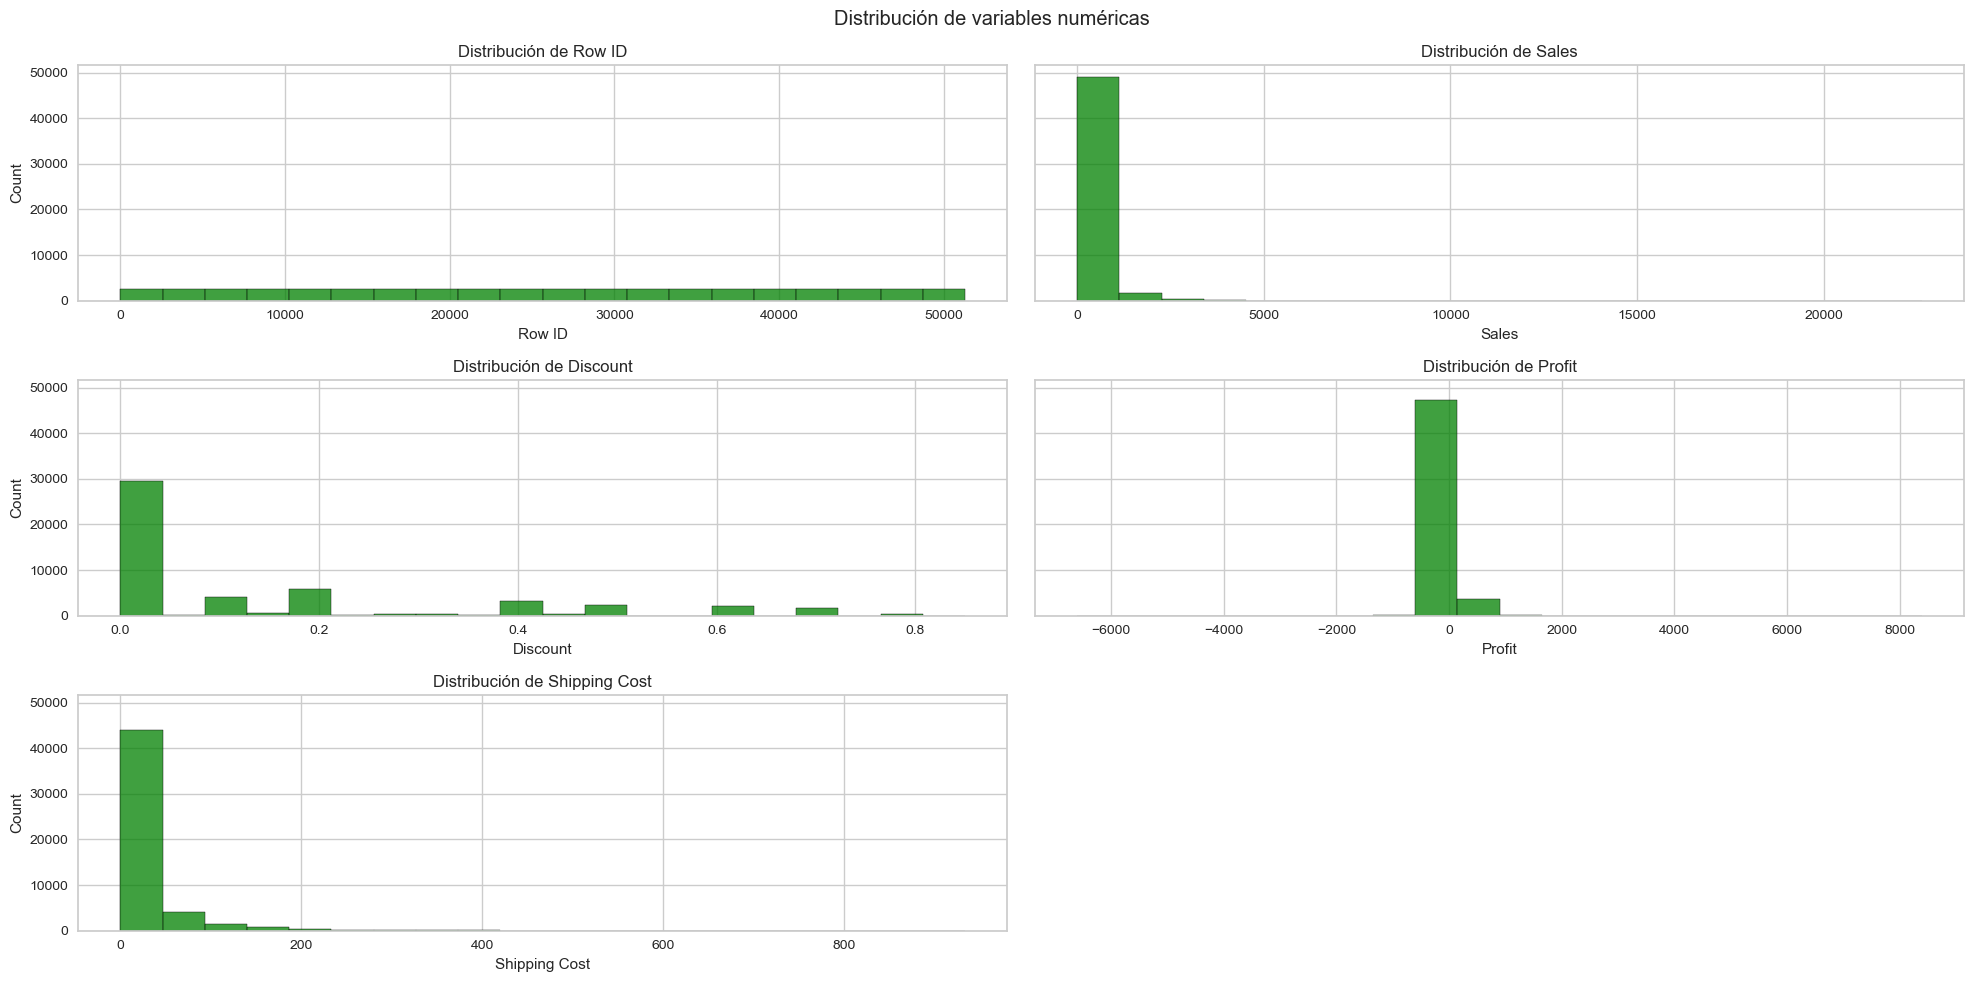

In [10]:
visualizado=f.Visualizador(df_crudo)
visualizado.plot_numericas(color="green", tamano_grafica=(20, 10))

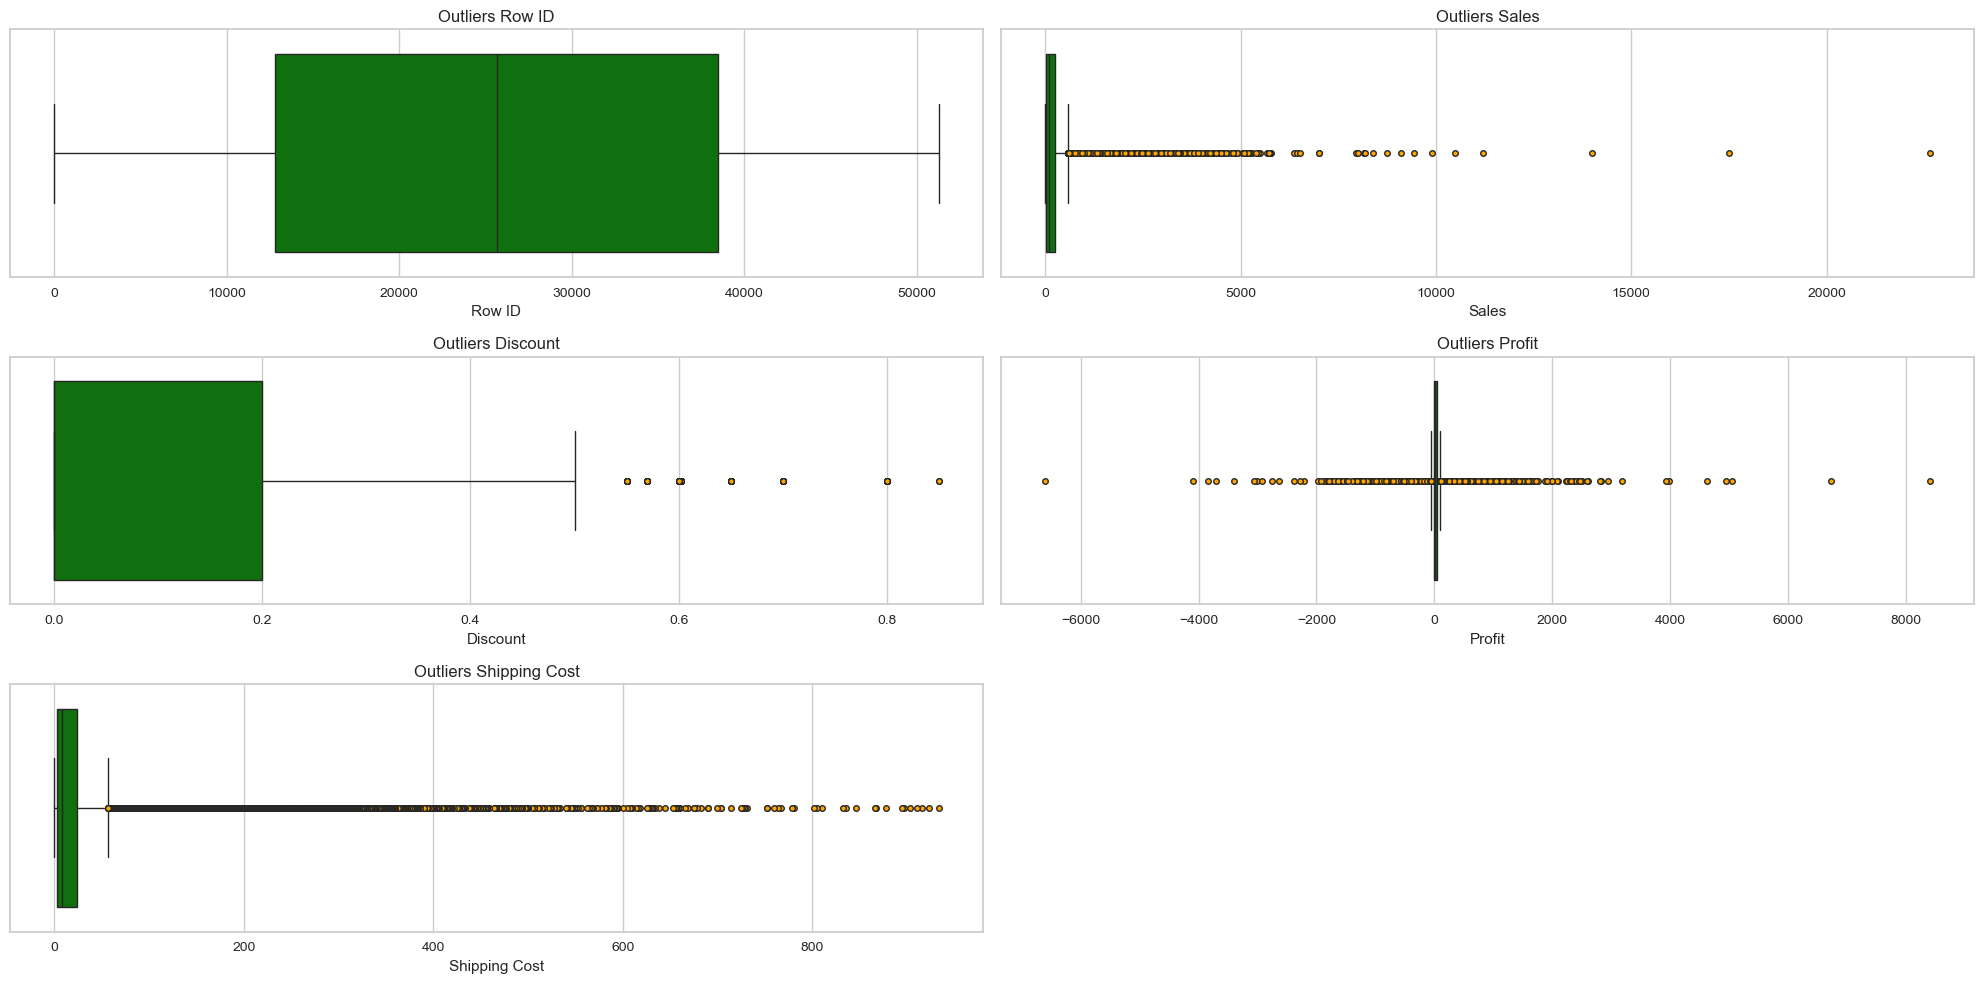

In [11]:
visualizado.deteccion_outliers( color = "green")

In [12]:
# visualizado.plot_categoricas(color="red", tamano_grafica=(20, 15))

Lo que sacamos en claro de ambas gráficas es que hay muy pocos outliers y que hay ciertas variables numéricas que tienen más sentido como categóricas

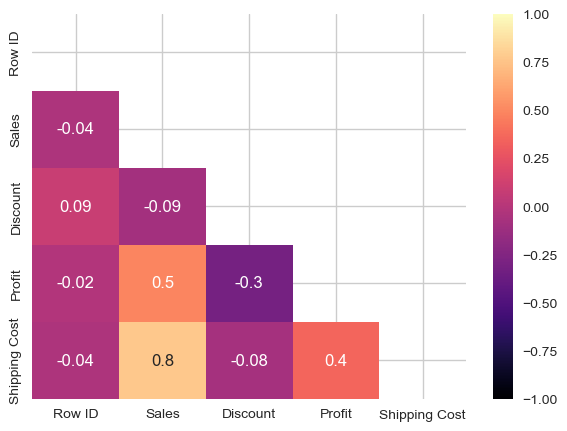

In [13]:
visualizado.correlacion(tamano_grafica = (7, 5))

Hay mucha correlación entre Shipping Cost y Sales

### *QUITAMOS LAS COLUMNAS INNECESARIAS PARA LOS CLUSTERS*

In [14]:
df_copy=df_crudo.copy()

In [15]:
df_copy.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer Name', 'Segment', 'City', 'State', 'Country', 'Market',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost',
       'Order Priority'],
      dtype='object')

In [16]:
lista_eliminar1=['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'State', 'Market', 'Region', 'Product ID','Product Name', 'Sales','Discount',
       'Profit', 'Shipping Cost', 'Order Priority']

In [17]:
df_copy.drop(columns=lista_eliminar1, inplace=True)

In [18]:
df_copy.head(2)

,Segment,City,Country,Category,Sub-Category,Quantity
customer_ID,,,,,,
RH-19495,Consumer,New York City,United States,Technology,Accessories,entre 7 y 8
JR-16210,Corporate,Wollongong,Australia,Furniture,Chairs,entre 9 y 10


In [19]:
df_copy["Quantity"].unique()

array(['entre 7 y 8', 'entre 9 y 10', 'entre 5 y 6', 'entre 3 y 4',
       'entre 13 y 14', 'entre 11 y 12', 'entre 13 y14', 'entre 1 y 2'],
      dtype=object)

In [20]:
df_copy["Segment"].value_counts()

Segment
Consumer       26518
Corporate      15429
Home Office     9343
Name: count, dtype: int64

In [21]:
df_copy["City"].value_counts()   

City
New York City     915
Los Angeles       747
Philadelphia      537
San Francisco     510
Santo Domingo     443
                 ... 
Vesoul              1
Várzea Grande       1
Luanshya            1
Kissimmee           1
Victoria Falls      1
Name: count, Length: 3636, dtype: int64

In [22]:
df_copy["Country"].value_counts()  

Country
United States    9994
Australia        2837
France           2827
Mexico           2644
Germany          2065
                 ... 
Bahrain             2
South Sudan         2
Chad                2
Burundi             2
Eritrea             2
Name: count, Length: 147, dtype: int64

In [23]:
df_copy["Category"].value_counts()

Category
Office Supplies    31273
Technology         10141
Furniture           9876
Name: count, dtype: int64

In [24]:
df_copy["Sub-Category"].value_counts()

Sub-Category
Binders        6152
Storage        5059
Art            4883
Paper          3538
Chairs         3434
Phones         3357
Furnishings    3170
Accessories    3075
Labels         2606
Envelopes      2435
Supplies       2425
Fasteners      2420
Bookcases      2411
Copiers        2223
Appliances     1755
Machines       1486
Tables          861
Name: count, dtype: int64

In [25]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51290 entries, RH-19495 to MC-18100
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Segment       51290 non-null  object
 1   City          51290 non-null  object
 2   Country       51290 non-null  object
 3   Category      51290 non-null  object
 4   Sub-Category  51290 non-null  object
 5   Quantity      51290 non-null  object
dtypes: object(6)
memory usage: 4.8+ MB


## EDA  
  
**NULOS**  
Se han identificado nulos en el Código postal y dado que el 80% son nulos, nos cargamos la columna
  
**DUPLICADOS**  
No se han identificado duplicados en el dataframe original 

**FORMATEOS**  
La siguiente columna se pasa a categórica:  
- Quantity
  

**COLUMNAS A ELIMINAR para CLUSTER**  

- Como me quiero centrar en agrupar distintos tipos de clientes, algunas columnas de producto me sobran me acabo quedando con Customer ID (para meter al índice), Segment, City, Country, Category, Sub-category y Quantity .


**COLUMNAS MUY RELACIONADAS**   


     
**DATOS DE INTERÉS**  
Me fijé en que hay el dobre de Consumer ID que de nombres de clientes además de que observando los clientes por nombre me di cuenta que aparecía en distintas geografias el mismo nombre etc con lo que concluí que debía pasar el Consumer ID al index en lugar del nombre porque personas de distintos lugares podían tener el mismo nombre.
  
**OUTLIERS** 

  

In [26]:
visualizador=f.Visualizador(df_copy)

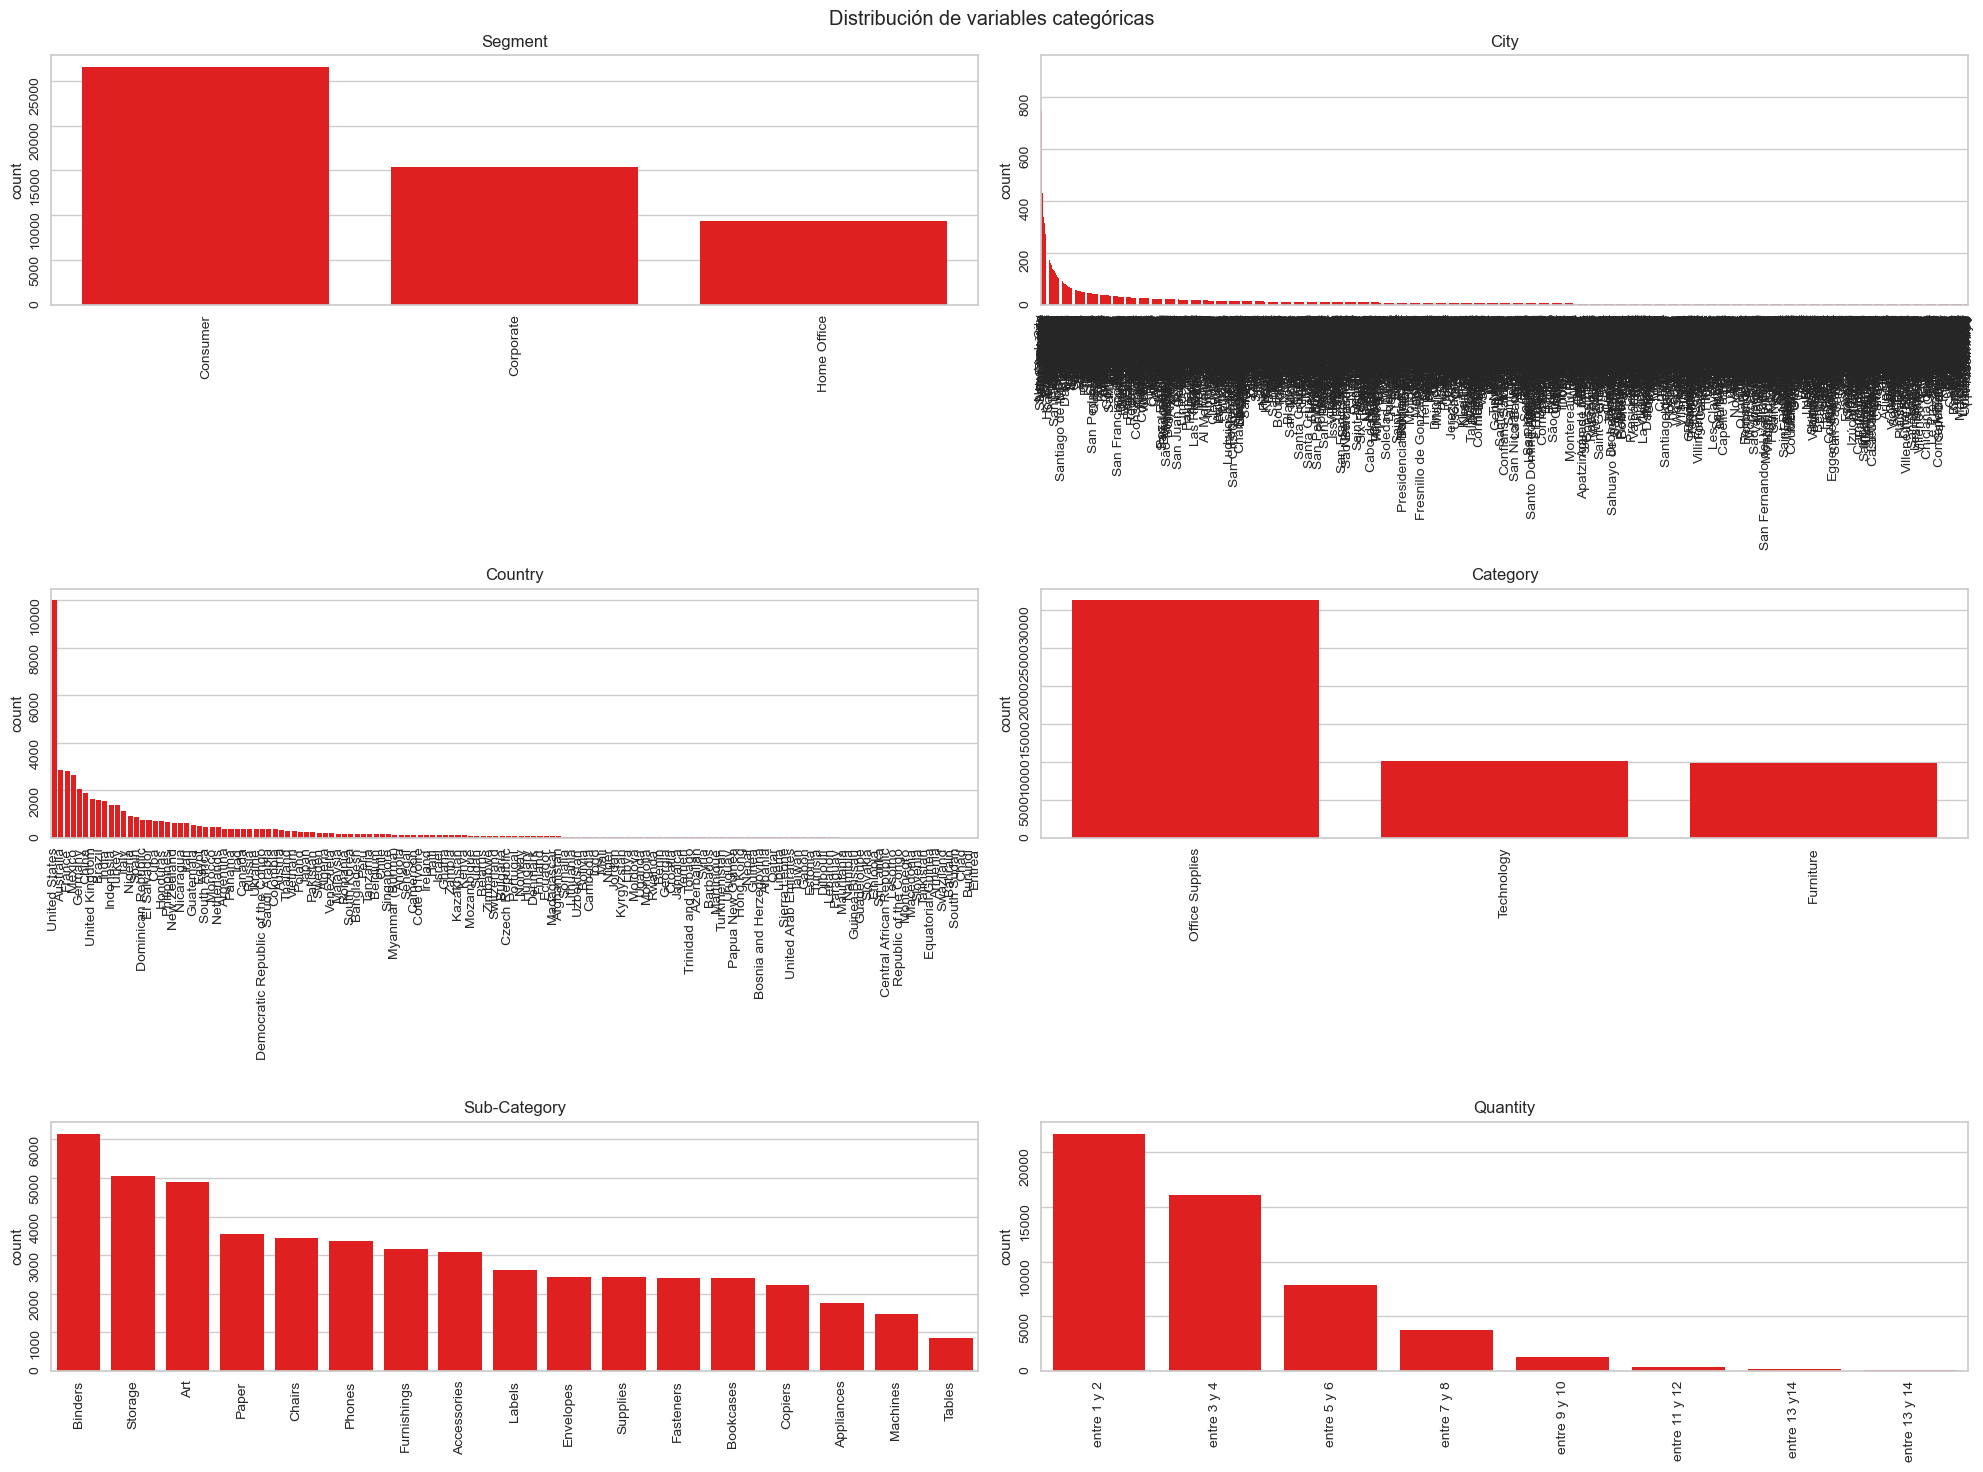

In [27]:
visualizador.plot_categoricas(color="red", tamano_grafica=(20, 15))

Tal y como vemos, este Data Frame cuenta con sólo categóricas y dado que son todas bastante diferentes, no nos planteamos usar One-Hot sino un Frequency para todas las columnas

# ENCODING

In [28]:
df_copy.shape

(51290, 6)

In [29]:
df_copy.head(2)

,Segment,City,Country,Category,Sub-Category,Quantity
customer_ID,,,,,,
RH-19495,Consumer,New York City,United States,Technology,Accessories,entre 7 y 8
JR-16210,Corporate,Wollongong,Australia,Furniture,Chairs,entre 9 y 10


In [30]:
df_encoded=f.codificar(df_copy)

In [31]:
df_encoded.head(3)

,Segment,City,Country,Category,Sub-Category,Quantity
customer_ID,,,,,,
RH-19495,0.517021,0.017840,0.194853,0.197719,0.059953,0.073036
JR-16210,0.300819,0.002554,0.055313,0.192552,0.066953,0.024625
CR-12730,0.517021,0.003470,0.055313,0.197719,0.065451,0.024625


Saco boxplots para saber qué estandarización será mejor

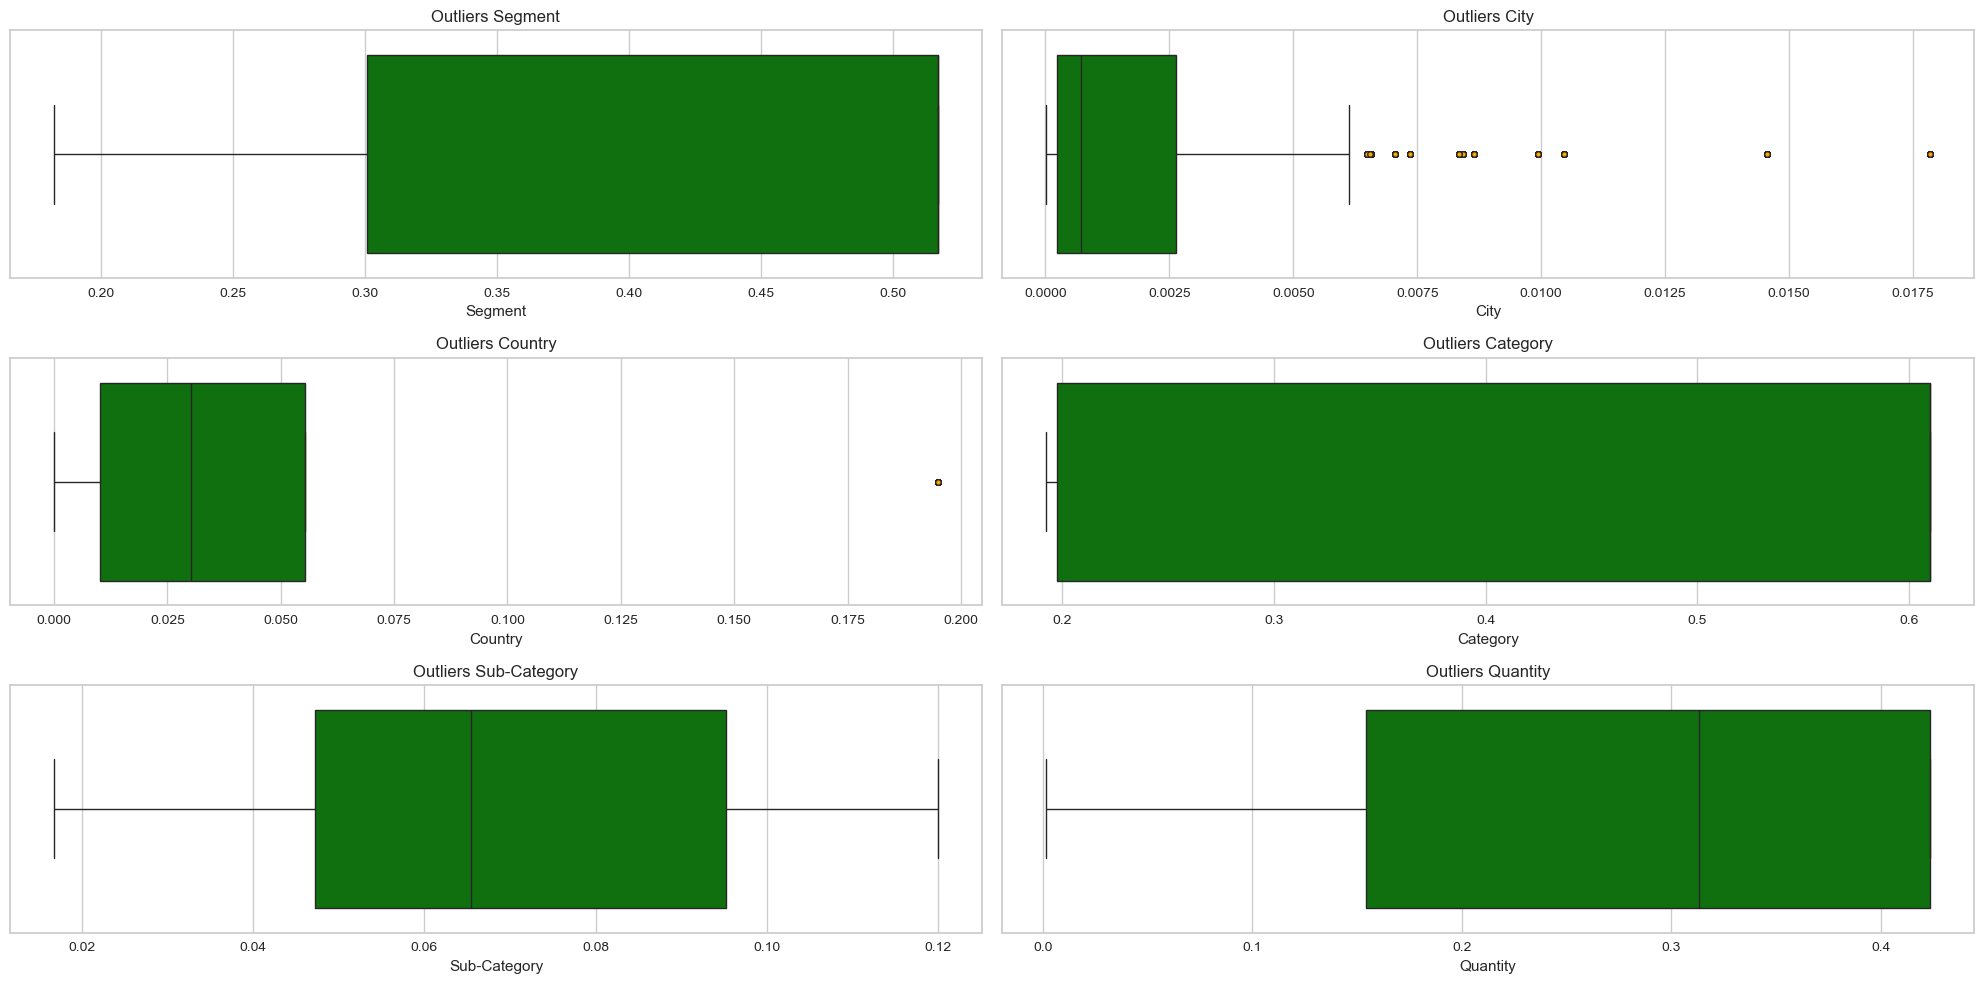

In [32]:
visualizador_enc=f.Visualizador(df_encoded)
visualizador_enc.deteccion_outliers( color = "green")

En los boxplots observo que hay datos atípicos pero como de origen eran variable categóricas y tras haber estudiado a que datos correspondían. He llegado a la conclusión de que quiero mantenerlos y darles importancia porque no son erróneos. Por ello me planteo el Robust pero dado que realmente son categóricas también el MinMax

## ESTANDARIZO

In [33]:
df_encoded.reset_index(inplace=True)

In [34]:
df_encoded.head(3)

,customer_ID,Segment,City,Country,Category,Sub-Category,Quantity
0,RH-19495,0.517021,0.017840,0.194853,0.197719,0.059953,0.073036
1,JR-16210,0.300819,0.002554,0.055313,0.192552,0.066953,0.024625
2,CR-12730,0.517021,0.003470,0.055313,0.197719,0.065451,0.024625


In [35]:
scaler=RobustScaler()
nums=df_encoded.select_dtypes(include=np.number)
cols_num=nums.columns
dfa=scaler.fit_transform(nums)
df=pd.DataFrame(dfa, columns=cols_num)
df_encoded[cols_num]= df

In [36]:
df_encoded.head()

,customer_ID,Segment,City,Country,Category,Sub-Category,Quantity
0,RH-19495,0.000000,7.138211,3.643782,-1.00000,-0.114727,-0.892244
1,JR-16210,-1.000000,0.764228,0.553541,-1.01254,0.031326,-1.072054
2,CR-12730,0.000000,1.146341,0.553541,-1.00000,0.000000,-1.072054
3,KM-16375,-1.548832,1.463415,0.220207,-1.00000,0.000000,-0.591281
4,RH-9495,0.000000,0.390244,-0.623057,-1.00000,-0.461351,-0.892244


In [37]:
df_encoded.set_index("customer_ID", inplace=True)

In [38]:
df_encoded.head(2)

,Segment,City,Country,Category,Sub-Category,Quantity
customer_ID,,,,,,
RH-19495,0.0,7.138211,3.643782,-1.00000,-0.114727,-0.892244
JR-16210,-1.0,0.764228,0.553541,-1.01254,0.031326,-1.072054


In [39]:
df_encoded.isna().sum()

Segment         0
City            0
Country         0
Category        0
Sub-Category    0
Quantity        0
dtype: int64

Pruebo primero con el KMEANS y el método del codo

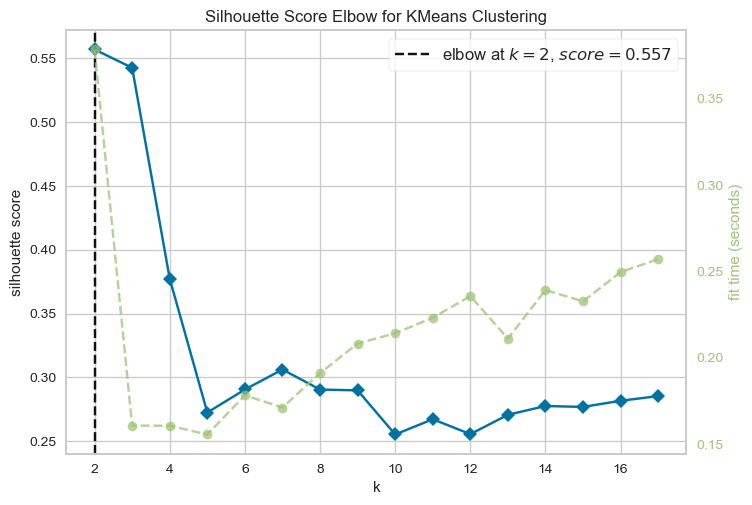

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [40]:
model= KMeans(random_state=42 )
visualizado=KElbowVisualizer(model,k=(2,18), metric="silhouette")  #el silhouette va de 0 a 1 siendo 1 mejor  k es el número de clusters
visualizado.fit(df_encoded)
visualizado.show()

Linea verde refleja el tiempo de computación  
Linea azul es el score seleccionado  
Buscamos la mayor tasa de incremento entre el punto actual y el siguiente minimazndo la línea verde (Tiempo de computación)  

***Dado que viendo el gráfico para mi tiene más sentido usar una K=3 en vez de K=2 procederé con el K=3***   

In [41]:
modelo_kmeans= KMeans(n_clusters=3)
km_fit= modelo_kmeans.fit(df_encoded)  #Nos agrupa los datos en 2 grupos
km_fit.labels_ 
df_kmeans=df_encoded.copy()
df_kmeans["cluster"]= km_fit.labels_ 
df_kmeans.sample(5)

,Segment,City,Country,Category,Sub-Category,Quantity,cluster
customer_ID,,,,,,,
TC-21475,-1.548832,1.089431,-0.300518,0.0,0.073637,-0.591281,0
KD-16495,-1.000000,0.040650,3.643782,0.0,-0.651749,0.000000,2
SJ-20125,-1.548832,1.983740,0.033679,0.0,-0.381204,0.408719,0
RH-19600,0.000000,1.691057,-0.528497,0.0,0.692433,0.408719,0
LT-17110,0.000000,-0.203252,0.018998,0.0,-0.381204,-0.591281,2


In [42]:
type(df_kmeans["cluster"])

pandas.core.series.Series

In [43]:

clust = f.Clustering(df_encoded)


clust.calcular_metricas(labels=df_kmeans["cluster"])

,silhouette_score,davies_bouldin_index,cardinalidad
0,0.218596,1.341049,9080
1,0.218596,1.341049,4541
2,0.218596,1.341049,37669


In [44]:
lista_cols_kmeans=df_kmeans.columns.drop("cluster")

GRÁFICAS PARA BUSCAR PATRONES EN LOS CLUSTERS

In [45]:
df_kmeans.head()

,Segment,City,Country,Category,Sub-Category,Quantity,cluster
customer_ID,,,,,,,
RH-19495,0.000000,7.138211,3.643782,-1.00000,-0.114727,-0.892244,1
JR-16210,-1.000000,0.764228,0.553541,-1.01254,0.031326,-1.072054,2
CR-12730,0.000000,1.146341,0.553541,-1.00000,0.000000,-1.072054,0
KM-16375,-1.548832,1.463415,0.220207,-1.00000,0.000000,-0.591281,0
RH-9495,0.000000,0.390244,-0.623057,-1.00000,-0.461351,-0.892244,2


In [46]:
lista_cols_kmeans

Index(['Segment', 'City', 'Country', 'Category', 'Sub-Category', 'Quantity'], dtype='object')

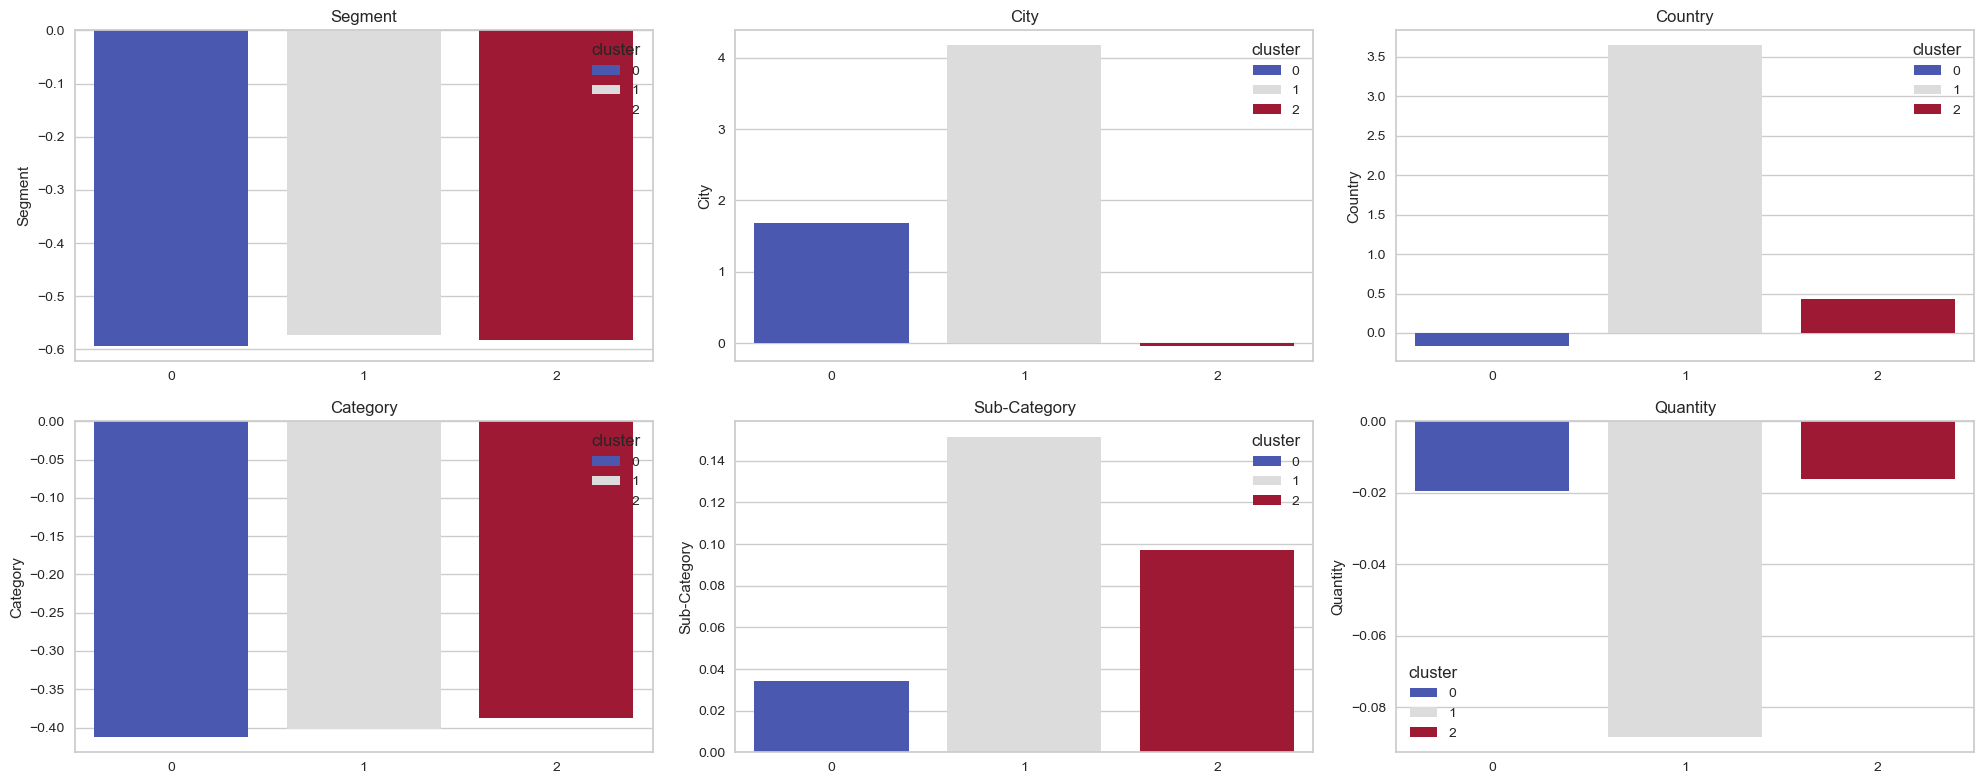

In [47]:

fig, axes =plt.subplots(nrows=2, ncols=math.ceil(len(lista_cols_kmeans)/2), figsize=(20,8))
axes=axes.flat
for indice, columna in enumerate(lista_cols_kmeans):
    df_group= df_kmeans.groupby("cluster")[columna].mean().reset_index()
    sns.barplot(x="cluster", y= columna ,hue="cluster", data= df_group, ax=axes[indice],palette="coolwarm")
    axes[indice].set_title(columna)
    axes[indice].set_xlabel("")
plt.tight_layout()
# fig.delaxes(axes[-1])

In [48]:
df_kmeans.head()

,Segment,City,Country,Category,Sub-Category,Quantity,cluster
customer_ID,,,,,,,
RH-19495,0.000000,7.138211,3.643782,-1.00000,-0.114727,-0.892244,1
JR-16210,-1.000000,0.764228,0.553541,-1.01254,0.031326,-1.072054,2
CR-12730,0.000000,1.146341,0.553541,-1.00000,0.000000,-1.072054,0
KM-16375,-1.548832,1.463415,0.220207,-1.00000,0.000000,-0.591281,0
RH-9495,0.000000,0.390244,-0.623057,-1.00000,-0.461351,-0.892244,2


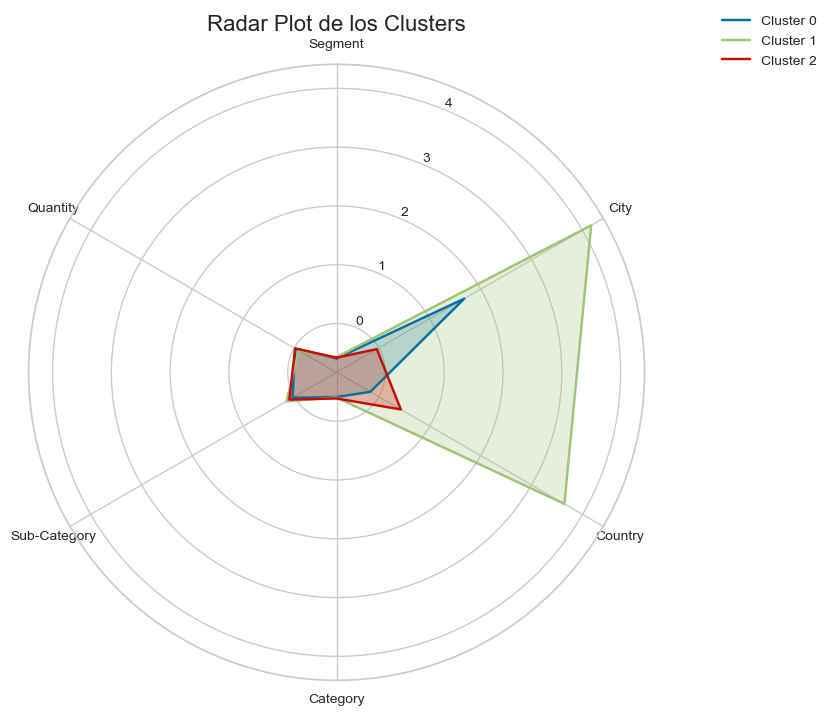

In [49]:

# Variables que deseas incluir en el radar plot
lista_cols_kmeans

# Agrupar por cluster y calcular la media
cluster_means = df_kmeans.groupby('cluster')[lista_cols_kmeans].mean()

# Repetir la primera columna al final para cerrar el radar
cluster_means = pd.concat([cluster_means, cluster_means.iloc[:, 0:1]], axis=1)

# Crear los ángulos para el radar plot
num_vars = len(lista_cols_kmeans)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Cerrar el gráfico

# Crear el radar plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Dibujar un gráfico para cada cluster
for i, row in cluster_means.iterrows():
    ax.plot(angles, row, label=f'Cluster {i}')
    ax.fill(angles, row, alpha=0.25)

# Configurar etiquetas de los ejes
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(lista_cols_kmeans)

# Añadir leyenda y título
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.title('Radar Plot de los Clusters', size=16)
plt.show()

### CONCLUSIONES  
Observamos 3 clusters bien marcados:  
- **Cluster 2:** representa lo que parecen clientes agrupados por una localización geográfica específica (Ej: New York o United States). En definitiva, este cluster agrupa los clientes que se ubican en ciudades/países de donde se reciben muchas órdenes.  Además son lo que compran las subcategorías más frecuentes (Ej: paper)
  
- **Cluster 1:** representa lo que parecen clientes que no destacan mucho en ninguna categoría o lo que es lo mismo, clientes genéricos.   Aunque este grupo de clientes es el que pide mas productos que los de los otros clusters. Además son lo que compran las subcategorías menos frecuentes (Ej: Appliances) 
  
- **Cluster 0:** representa lo que parecen clientes con menor relevancia en las variables analizadas, es decir,  posiblemente son clientes con menor representación (Ej: clientes de paises donde ha habido un muy bajo volúmen de órdenes). Aunque este grupo de clientes si que piden más productos que los de los otros clusters.   
  
**En definitiva, los grupos de clientes quedan separados por geografía, cantidad de productos comprados y las subcategorías de productos**

# **Ahora unimos la columna que identifica los clusters al df original**

In [50]:
df_crudo.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
customer_ID,,,,,,,,,,,,,,,,,,,,,,
RH-19495,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,Rick Hansen,Consumer,New York City,New York,United States,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,entre 7 y 8,0.0,762.1845,933.57,Critical
JR-16210,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,entre 9 y 10,0.1,-288.7650,923.63,Critical


In [51]:
df_kmeans.head(2)

,Segment,City,Country,Category,Sub-Category,Quantity,cluster
customer_ID,,,,,,,
RH-19495,0.0,7.138211,3.643782,-1.00000,-0.114727,-0.892244,1
JR-16210,-1.0,0.764228,0.553541,-1.01254,0.031326,-1.072054,2


In [52]:
df_crudo.shape

(51290, 22)

In [53]:
df_kmeans.shape

(51290, 7)

In [54]:
df_kmeans.columns=["segment","city", "country", "category", "subcategory","quantity", "cluster"]

In [55]:
df_kmeans.head(2)

,segment,city,country,category,subcategory,quantity,cluster
customer_ID,,,,,,,
RH-19495,0.0,7.138211,3.643782,-1.00000,-0.114727,-0.892244,1
JR-16210,-1.0,0.764228,0.553541,-1.01254,0.031326,-1.072054,2


In [56]:
df_mergeado=pd.DataFrame()
df_mergeado=pd.concat([df_mergeado, df_crudo, df_kmeans], axis=1)

In [57]:
df_mergeado.shape

(51290, 29)

In [58]:
df_mergeado.sample(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,segment,city,country,category,subcategory,quantity,cluster
customer_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
EM-14095,15522,ES-2012-5557687,14-05-2012,20-05-2012,Standard Class,Eudokia Martin,Corporate,Rugby,England,United Kingdom,EU,North,OFF-ST-10002506,Office Supplies,Storage,"Smead Lockers, Blue",793.680,entre 3 y 4,0.0,134.8800,57.90,Medium,-1.000000,-0.203252,0.033679,0.00000,0.692433,0.000000,2
SL-20155,29843,IN-2013-42521,13-06-2013,15-06-2013,Second Class,Sara Luxemburg,Home Office,Sakai,Gunma,Japan,APAC,North Asia,FUR-CH-10003692,Furniture,Chairs,"SAFCO Swivel Stool, Set of Two",255.285,entre 3 y 4,0.5,-199.1250,52.24,Critical,-1.548832,-0.170732,-0.563472,-1.01254,0.031326,0.000000,2
GH-14665,21020,IN-2014-28136,28-06-2014,04-07-2014,Standard Class,Greg Hansen,Consumer,Chittagong,Chittagong,Bangladesh,APAC,Central Asia,TEC-AC-10004813,Technology,Accessories,"SanDisk Keyboard, Bluetooth",325.920,entre 3 y 4,0.0,78.1200,33.24,Medium,0.000000,-0.032520,-0.601036,-1.00000,-0.114727,0.000000,2
JD-6150,50349,IZ-2014-2130,10-12-2014,16-12-2014,Standard Class,Justin Deggeller,Corporate,Baghdad,Baghdad,Iraq,EMEA,EMEA,TEC-STA-10004536,Technology,Machines,"StarTech Inkjet, Wireless",301.770,entre 1 y 2,0.0,9.0300,18.73,Medium,-1.000000,1.105691,-0.503886,-1.00000,-0.761188,0.408719,0
KT-16480,33398,US-2011-140116,10-03-2011,17-03-2011,Standard Class,Kean Thornton,Consumer,Denver,Colorado,United States,US,West,OFF-AR-10001044,Office Supplies,Art,"BOSTON Ranger #55 Pencil Sharpener, Black",83.168,entre 3 y 4,0.2,9.3564,15.56,Low,0.000000,0.056911,3.643782,0.00000,0.620830,0.000000,2


In [59]:
df_mergeado.drop(columns=["segment","city", "country", "category", "subcategory","quantity"], inplace=True)

In [60]:
df_mergeado.shape

(51290, 23)

In [61]:
df_cluster0=df_mergeado[df_mergeado["cluster"]== 0]
df_cluster1=df_mergeado[df_mergeado["cluster"]== 1]
df_cluster2=df_mergeado[df_mergeado["cluster"]== 2]

In [62]:
df_cluster0.shape

(9080, 23)

In [63]:
df_cluster0.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,cluster
customer_ID,,,,,,,,,,,,,,,,,,,,,,,
CR-12730,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,Craig Reiter,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,entre 9 y 10,0.1,919.971,915.49,Medium,0
KM-16375,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,Katherine Murray,Home Office,Berlin,Berlin,Germany,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,entre 5 y 6,0.1,-96.540,910.16,Medium,0


In [64]:
df_cluster0.duplicated().sum()

0

In [65]:
df_cluster1.shape

(4541, 23)

In [66]:
df_cluster1.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,cluster
customer_ID,,,,,,,,,,,,,,,,,,,,,,,
RH-19495,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,Rick Hansen,Consumer,New York City,New York,United States,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,entre 7 y 8,0.0,762.1845,933.57,Critical,1
SA-20830,31784,CA-2011-154627,29-10-2011,31-10-2011,First Class,Sue Ann Reed,Consumer,Chicago,Illinois,United States,US,Central,TEC-PH-10001363,Technology,Phones,Apple iPhone 5S,2735.952,entre 5 y 6,0.2,341.9940,752.51,High,1


In [67]:
df_cluster1.duplicated().sum()

0

In [68]:
df_cluster2.shape

(37669, 23)

In [69]:
df_cluster2.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,cluster
customer_ID,,,,,,,,,,,,,,,,,,,,,,,
JR-16210,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,entre 9 y 10,0.1,-288.765,923.63,Critical,2
RH-9495,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,Rick Hansen,Consumer,Dakar,Dakar,Senegal,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,entre 7 y 8,0.0,311.520,903.04,Critical,2


In [70]:
df_cluster2.duplicated().sum()

0

In [71]:
# df_crudo.to_csv("..\..\datos\datos_clustering\datos_clusterizados")